Load input data (measurements)

In [1]:
import pandas as pd
import os
from python_calamine.pandas import pandas_monkeypatch
pandas_monkeypatch()

path = "C:/Users/emijo/OneDrive - Danmarks Tekniske Universitet/Dokumenter/SYNERGIES/Data BH"
file = 'Bornholm 20220706.xlsx'

current_directory = os.getcwd()

new_path = os.path.join(current_directory, file)
smart_meter_data = os.path.join(current_directory,'DWH Data Bornholm.xlsx')
smart_meter_measurements = pd.read_excel(smart_meter_data, engine='calamine')
prod_or_con= smart_meter_measurements.iloc[[2]]



In [2]:
import Data_preprocessing_BH
from Data_preprocessing_BH import *
import os
import importlib
import random as rnd
importlib.reload(Data_preprocessing_BH)

measurement_number = rnd.randint(3, len(smart_meter_measurements))
smart_meter_measurements_sorted = fix_datetime(smart_meter_measurements)
# measurement_number = 100
measurement_number = 6475
print('Index of measurement:', (measurement_number+3))
print('Datetime:', (smart_meter_measurements_sorted['datetime'][measurement_number]))
measurement_prod_cons = aggregated_measurements_substation_demo(smart_meter_measurements_sorted, prod_or_con,measurement_number = measurement_number)

import create_BH_net
from create_BH_net import *
import importlib
importlib.reload(create_BH_net)
import pandapower as pp
path = "C:/Users/emijo/OneDrive - Danmarks Tekniske Universitet/Dokumenter/SYNERGIES/Data BH"
file = 'Bornholm 20220706.xlsx'
new_path = os.path.join(path, file)

net = pp.create_empty_network()

net = load_data(new_path, net)

net = net_60kV_measurements(net, measurement_prod_cons)

Index of measurement: 6478
Datetime: 2022-03-09 18:00:00


In [3]:
measurement_prod_cons

,Substation,Consumption,Production
0,Åkirkeby,0.77149,-0.78250
1,Allinge,0.45431,-0.04039
2,Bodilsker,0.26025,-0.28943
3,Gudhjem,0.26231,-0.02476
4,Hasle,0.84296,-0.05492
5,Nexø,0.51612,-0.07601
6,Olsker,0.29146,-0.05532
7,Østerlars,0.38556,-0.04843
8,Povlsker,0.36743,-0.06266
9,Rønne Nord,0.95323,-0.05467


Power flow engine results

In [3]:
import Power_flow
from Power_flow import *
import Data_preprocessing_BH
import pandapower as pp
import importlib
importlib.reload(Power_flow)

# Path to CSV and new path for load_data function
measurement_prod_cons_csv_path = 'demo_smart_meter_measurements.csv'

# Perform power flow analysis
datetimes, secure_list, voltage_violations_list, overloaded_lines_list, overloaded_transformers_list, line_loadings_list, trafo_loadings_list, bus_voltages_injections_list = perform_power_flow_analysis(measurement_prod_cons_csv_path, new_path)

# Define the path to the Excel file
excel_path = 'results_powerflow_engine.xlsx'

# Write results to the Excel file
write_results_to_excel(excel_path, datetimes, secure_list, voltage_violations_list, overloaded_lines_list, overloaded_transformers_list, line_loadings_list, trafo_loadings_list, bus_voltages_injections_list)

# Open the Excel file
os.startfile(excel_path)


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



No voltage violations detected.
No overloaded transformers detected.
No overloaded lines detected.
Line loadings:
     from_bus  to_bus              from_bus_name      to_bus_name  \
0          0       2                    Hasle A     Snorrebakken   
1          2      19               Snorrebakken        Vaerket A   
2         21      19                 Vesthavnen        Vaerket A   
3         22      19  Auxiliary bus Viadukten 1        Vaerket A   
4         19      18                  Vaerket A        Ronne Syd   
5          4      21                 Ronne Nord       Vesthavnen   
6          0       4                    Hasle A       Ronne Nord   
7         23       4  Auxiliary bus Viadukten 2       Ronne Nord   
8         24      18  Auxiliary bus Viadukten 3        Ronne Syd   
9         11      18                  Aakirkeby        Ronne Syd   
10        11       9                  Aakirkeby        Bodilsker   
11        10       9                   Poulsker        Bodilsker   
1

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



No voltage violations detected.
No overloaded transformers detected.
No overloaded lines detected.
Line loadings:
     from_bus  to_bus              from_bus_name      to_bus_name  \
0          0       2                    Hasle A     Snorrebakken   
1          2      19               Snorrebakken        Vaerket A   
2         21      19                 Vesthavnen        Vaerket A   
3         22      19  Auxiliary bus Viadukten 1        Vaerket A   
4         19      18                  Vaerket A        Ronne Syd   
5          4      21                 Ronne Nord       Vesthavnen   
6          0       4                    Hasle A       Ronne Nord   
7         23       4  Auxiliary bus Viadukten 2       Ronne Nord   
8         24      18  Auxiliary bus Viadukten 3        Ronne Syd   
9         11      18                  Aakirkeby        Ronne Syd   
10        11       9                  Aakirkeby        Bodilsker   
11        10       9                   Poulsker        Bodilsker   
1

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



No voltage violations detected.
No overloaded transformers detected.
No overloaded lines detected.
Line loadings:
     from_bus  to_bus              from_bus_name      to_bus_name  \
0          0       2                    Hasle A     Snorrebakken   
1          2      19               Snorrebakken        Vaerket A   
2         21      19                 Vesthavnen        Vaerket A   
3         22      19  Auxiliary bus Viadukten 1        Vaerket A   
4         19      18                  Vaerket A        Ronne Syd   
5          4      21                 Ronne Nord       Vesthavnen   
6          0       4                    Hasle A       Ronne Nord   
7         23       4  Auxiliary bus Viadukten 2       Ronne Nord   
8         24      18  Auxiliary bus Viadukten 3        Ronne Syd   
9         11      18                  Aakirkeby        Ronne Syd   
10        11       9                  Aakirkeby        Bodilsker   
11        10       9                   Poulsker        Bodilsker   
1

Contingency engine results

In [4]:
import pandas as pd
import Power_flow
from Power_flow import *
from Contingency import*
import Contingency
import Data_preprocessing_BH
import pandapower as pp
import importlib
importlib.reload(Power_flow)
importlib.reload(Contingency)

n_scenarios = 10
scenarios = []
outages_list = []
voltage_violations_list = []
overloaded_lines_list = []
overloaded_transformers_list = []
line_loadings_list = []
trafo_loadings_list = []
bus_voltages_injections_list = []
measurement_prod_cons_new_list = []



    
scenarios.append('Current_operating_point')
net = pp.create_empty_network()
net = load_data(new_path, net)
net = net_60kV_measurements(net, measurement_prod_cons)
measurement_prod_cons_new = measurement_prod_cons.drop(columns = ['Production'])
outages, vvl, oll, otl, lll, tll, bvil = contingency_analysis_with_violations(net, measurement_prod_cons_new)
outages_list.append(outages)
voltage_violations_list.append(vvl)
overloaded_lines_list.append(oll)
overloaded_transformers_list.append(otl)
line_loadings_list.append(lll)
trafo_loadings_list.append(tll)
bus_voltages_injections_list.append(bvil)
measurement_prod_cons_new_list.append(measurement_prod_cons_new.copy())

for i in range(n_scenarios):
    print(i)
    
    scenarios.append(f'Scenario_{i}')

    net = pp.create_empty_network()
    net = load_data(new_path, net)
    new_cons = sample_normal_distributions(measurement_prod_cons['Consumption'])
    measurement_prod_cons_new = measurement_prod_cons
    measurement_prod_cons_new['Consumption'] = new_cons
    net = net_60kV_measurements(net, measurement_prod_cons_new)
    measurement_prod_cons_new= measurement_prod_cons_new.drop(columns = 'Production')

    outages, vvl, oll, otl, lll, tll, bvil = contingency_analysis_with_violations(net, measurement_prod_cons_new)
    outages_list.append(outages)
    voltage_violations_list.append(vvl)
    overloaded_lines_list.append(oll)
    overloaded_transformers_list.append(otl)
    line_loadings_list.append(lll)
    trafo_loadings_list.append(tll)
    bus_voltages_injections_list.append(bvil)
    measurement_prod_cons_new_list.append(measurement_prod_cons_new.copy())

excel_path = 'results_contingency_analysis.xlsx'
save_results_to_excel(scenarios, outages_list, voltage_violations_list, overloaded_lines_list, overloaded_transformers_list, line_loadings_list, trafo_loadings_list, bus_voltages_injections_list, measurement_prod_cons_new_list, excel_path)
# Open the Excel file
os.startfile(excel_path)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

0


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

1


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

2


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

3


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

4


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

5


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

6


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

7


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

8


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

9


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

Results have been saved to results_contingency_analysis.xlsx


In [ ]:
import Visualization
from Visualization import *
import importlib
import os
importlib.reload(Visualization)

from Power_flow import *
import Power_flow
importlib.reload(Power_flow)
secure, voltage_violations, overloaded_lines, overloaded_transformers, line_loadings, trafo_loadings, bus_voltages_injections = check_power_system_violations(net, print_results=False) 

## Define dataframes for plotting
substations_gdf, substations_df = get_gdf_substations()
buses_df = get_buses_df(net)
buses_gdf = get_buses_gdf(net, buses_df, substations_df)
gdf_10kV, gdf_60kV = get_buses_60_10_kV(buses_df, substations_df)
transformers_df = get_transformers_df(net)
transformers_gdf = get_transformer_gdf(transformers_df, substations_df)

import folium
import Visualization
from Visualization import *
import importlib
importlib.reload(Visualization)


# Create a folium map centered at the average coordinates of the substations
map_center = [substations_gdf['Latitude'].mean(), substations_gdf['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=9)

map = add_10_60kV_layers(map, gdf_10kV, gdf_60kV)

map = add_lines(map, buses_gdf, line_loadings['from_bus'], line_loadings['to_bus'], line_loadings['loading_percent'])
map = add_trafo(map, transformers_gdf, trafo_loadings)

marker_layer_control= folium.LayerControl(position='topleft').add_to(map)
marker_layer_control.add_to(map)

map.save('Bornholm measurement demo.html')
os.startfile('Bornholm measurement demo.html')




In [ ]:

measurements_csv = []
# measurement_number = rnd.randint(1, len(smart_meter_measurements)-3)
measurement_numbers = [6473, 6474, 6475]
date_time = smart_meter_measurements_sorted['datetime'][measurement_number]
print('Datetime:', (smart_meter_measurements_sorted['datetime'][measurement_number]))
# measurement_number = 1
# print('Index of measurement:', (measurement_number+3))
for i in measurement_numbers:
    print(i)
    measurement_prod_cons = aggregated_measurements_substation_demo(smart_meter_measurements_sorted, prod_or_con,measurement_number = i)
    measurement_prod_cons['datetime'] = smart_meter_measurements_sorted['datetime'][i]
    measurements_csv.append(measurement_prod_cons)

# Combine all measurements into a single DataFrame
combined_df = pd.concat(measurements_csv)

# Reorder columns if necessary to put timestamp first
combined_df = combined_df[['datetime', 'Substation', 'Production', 'Consumption']]


In [14]:
import Power_flow
from Power_flow import *
import pandapower as pp
import importlib
importlib.reload(Power_flow)
pp.runpp(net)

secure, voltage_violations, overloaded_lines, overloaded_transformers, line_loadings, trafo_loadings, bus_voltages_injections = check_power_system_violations(net)


Voltage violations detected at the following buses:
    vm_pu  va_degree      p_mw    q_mvar   Bus name
28   0.91        0.0 -4.044692  5.217089  Tomelilla
No overloaded transformers detected.
No overloaded lines detected.
Line loadings:
     from_bus  to_bus              from_bus_name      to_bus_name  \
0          0       2                    Hasle A     Snorrebakken   
1          2      19               Snorrebakken        Vaerket A   
2         21      19                 Vesthavnen        Vaerket A   
3         22      19  Auxiliary bus Viadukten 1        Vaerket A   
4         19      18                  Vaerket A        Ronne Syd   
5          4      21                 Ronne Nord       Vesthavnen   
6          0       4                    Hasle A       Ronne Nord   
7         23       4  Auxiliary bus Viadukten 2       Ronne Nord   
8         24      18  Auxiliary bus Viadukten 3        Ronne Syd   
9         11      18                  Aakirkeby        Ronne Syd   
10        11 

In [15]:
print(secure)

False


In [4]:
import Power_flow
from Power_flow import *
import pandapower as pp
import importlib
importlib.reload(Power_flow)
VaR_lines, CVaR_lines = compute_var_cvar(line_loadings['loading_percent'], confidence_level=0.95)
VaR_trafo, CVaR_trafo = compute_var_cvar(trafo_loadings['loading_percent'], confidence_level=0.95)
VaR_voltage, CVaR_voltage = compute_var_voltages(bus_voltages_injections['vm_pu'], confidence_level=0.95)

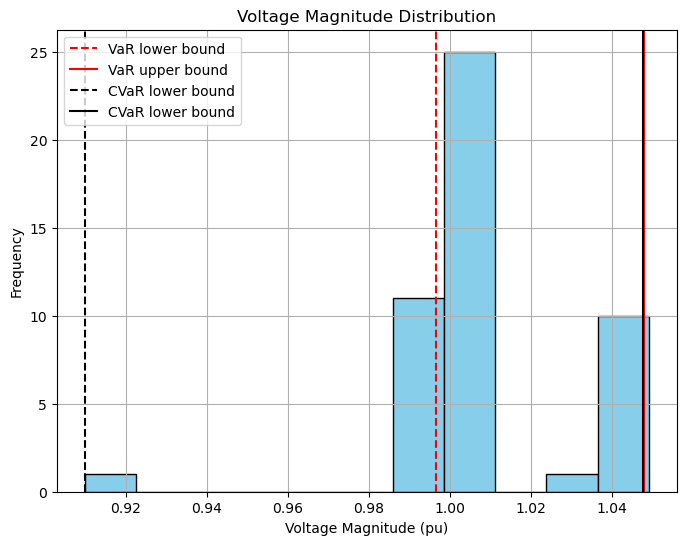

In [9]:
import Power_flow
from Power_flow import *
import pandapower as pp
import importlib
importlib.reload(Power_flow)
visualize_voltage_distributions(net, VaR_voltage, CVaR_voltage)

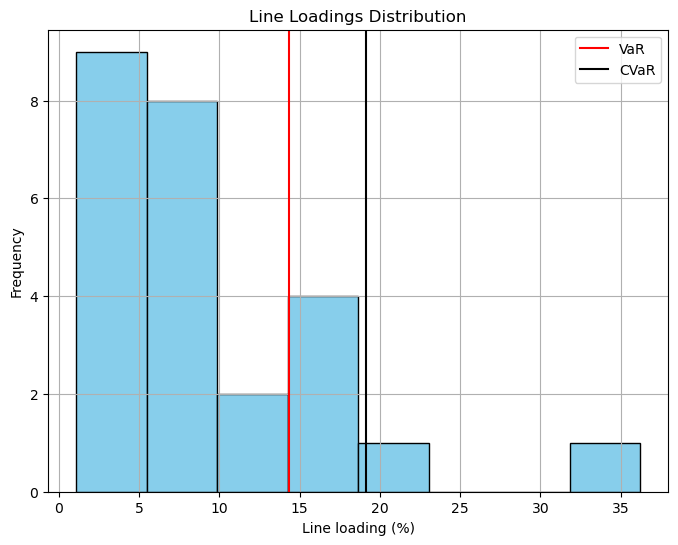

In [10]:
import Power_flow
from Power_flow import *
import pandapower as pp
import importlib
importlib.reload(Power_flow)
visualize_lineloadings_distributions(net, VaR_lines, CVaR_lines)

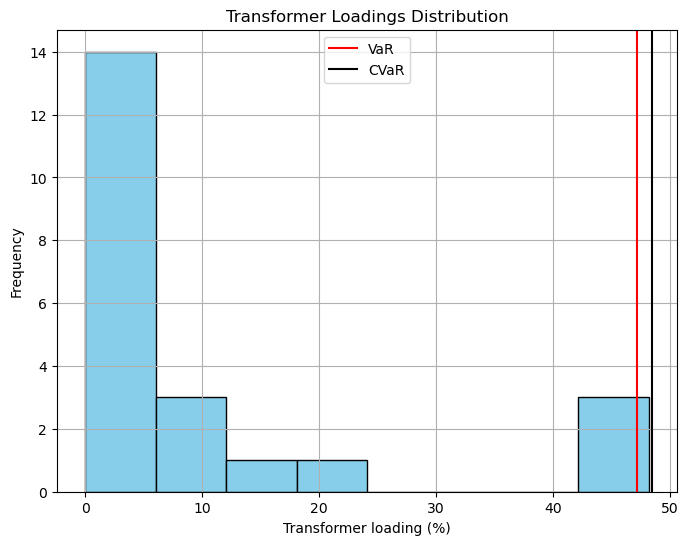

In [11]:
import Power_flow
from Power_flow import *
import pandapower as pp
import importlib
importlib.reload(Power_flow)
visualize_trafoloadings_distributions(net, VaR_trafo, CVaR_trafo)